In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.isna().sum(axis = 0)/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [5]:
df = df.drop(['Cabin'], axis = 1)

In [7]:
df = df[df.Age.notna()]

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [10]:
vars_disc = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for i in vars_disc:
    df[i].value_counts() 

In [16]:
vars_cat = ['Pclass', 'Sex', 'Embarked']

# one hot encoding.

def one_hot():
    for i in vars_cat :
        categorias = df[i].value_counts().index
        print(categorias)

        for k in categorias:
            name = 'is-' + str(i) + '-' + str(k)
            print(name)
            df[name] = np.where(df[i] == k, 1, 0)

        df = df.drop([i], axis = 1)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


In [17]:
# Outliers

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [19]:
df['family_size'] = df['SibSp'] + df['Parch']

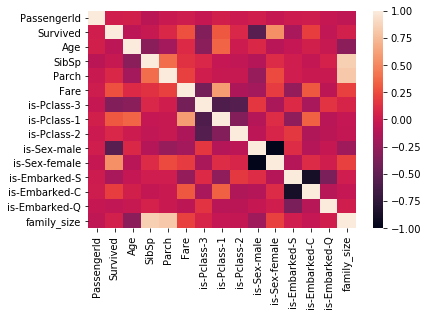

In [20]:
corr = df.corr()
sns.heatmap(corr, yticklabels = corr.columns, xticklabels = corr.columns)

In [21]:
df = pd.read_csv('titanic-master-table.csv')
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [28]:
y = df['Survived']
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size']]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = [
    (LogisticRegression(), 'reg-log'),
    (DecisionTreeClassifier(), 'arbol-class'),
]

In [35]:
import joblib
from sklearn.metrics import accuracy_score

for model, name in clf:
    #Entrear
    model.fit(X_train, y_train)
    #Medir
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name)
    print('resultado en la prueba del modelo : ', round(accuracy*100, 2), '%')
    #Guardar
    job_file = 'model-'+name+'.pkl'
    joblib.dump(model, job_file)

reg-log
resultado en la prueba del modelo :  79.35 %
arbol-class
resultado en la prueba del modelo :  71.74 %


C:\Users\mauri\anaconda3\envs\platzi_data\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
